# **Detection of Covid-19 using Deep Learning**

## Importing all the necessary libraries

Python uses various libraries in Keras for performing deep learning related computations. Here are few libraries that we will be using for the given task.

In [ ]:
#### This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Data preprocessing
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

# Deep learning
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D, Conv3D, MaxPooling3D,GlobalAveragePooling3D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.optimizers import Adam, SGD, RMSprop
import tensorflow as tf 
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing import image

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

## Adding the path of the dataset and dividing the dataset into two classes - Covid and Normal

The dataset contains lot of images as follows: 

In the 2nd update, they have increased the database to 
#####**3616 COVID-19 positive cases** along with 
#####**10,192 Normal**, 
#####**6012 Lung Opacity (Non-COVID lung infection)**, and 
#####**1345 Viral Pneumonia** images. 



For our use case, we have used only TWO classes of images - **Covid** and **Normal**

The dataset has been split into two - 70% for Training and 30% for Testing

In [ ]:
#All the images are in Portable Network Graphics (PNG) file format and the resolution are 299*299 pixels.
#
#add the path general where the classes subpath are allocated
path = '/kaggle/input/covid19-radiography-database/COVID-19_Radiography_Dataset'


#classes=["COVID", "Lung_Opacity", "Normal", "Viral Pneumonia"]
classes=["COVID",  "Normal"]
num_classes = len(classes)
print(num_classes)
batch_size=32

#split the datagen into 70% and 30%, train and test
datagen = ImageDataGenerator(rotation_range=20, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15, horizontal_flip=True, fill_mode="nearest", rescale=1./255, validation_split=0.3)

#load the images to training
train_gen = datagen.flow_from_directory(directory=path, 
                                              target_size=(299, 299),
                                              class_mode='categorical',
                                              subset='training',
                                              shuffle=True, classes=classes,
                                              batch_size=batch_size, 
                                              color_mode="grayscale")
#load the images to test
test_gen = datagen.flow_from_directory(directory=path, 
                                              target_size=(299, 299),
                                              class_mode='categorical',
                                              subset='validation',
                                              shuffle=True, classes=classes,
                                              batch_size=batch_size, 
                                              color_mode="grayscale")



2
Found 9667 images belonging to 2 classes.
Found 4141 images belonging to 2 classes.


## Building the CNN Architecture from scratch

We have built a basic CNN model in the following way:

**Conv2D -> Conv2D -> MaxPool -> Conv2D -> Conv2D -> MaxPool -> Conv2D -> Conv2D -> Flatten -> Dense -> Dense**

In [ ]:

def model1():
    
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(299, 299, 1)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(num_classes, activation='sigmoid'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=["accuracy"])
    model.summary()
    return model


We are fitting the model with **BATCH SIZE = 32** and **Number of Epochs = 10**.
After which on running(for a while), will give the loss and accuracy for each epoch as given

In [ ]:
epoch=10

modelo1 = model1() 


# fit model one
history1 = modelo1.fit_generator(train_gen, steps_per_epoch=len(train_gen) // batch_size, validation_steps=len(test_gen) // batch_size, validation_data=test_gen, epochs=epoch, verbose=2)

# fit model two


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 297, 297, 32)      320       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 295, 295, 32)      9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 147, 147, 32)      0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 145, 145, 64)      18496     
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 143, 143, 64)      36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 71, 71, 64)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 69, 69, 128)      

##Evaluation of our Model

The graph shown below is the plot between Loss(for both training and testing) and epochs

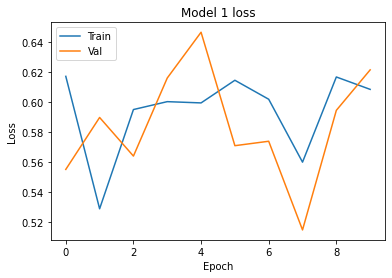

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model 1 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

##Evaluation of our Model

The graph shown below is the plot between Accuracy(for both training and testing) and epochs

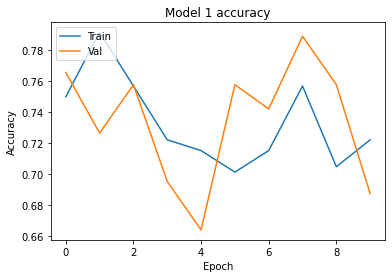

In [ ]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model 1 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

##Final Model Accuracy

In [ ]:
scores = modelo1.evaluate_generator(test_gen, steps=len(test_gen))
print(scores)
print('Model accuracy: {}'.format(scores[1]))

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.5773879885673523, 0.7382274866104126]
Model accuracy: 0.7382274866104126
